In [1]:
import py2neo as p2n
from py2neo import Graph, Node, Relationship
from scripts.vis import draw
import networkx as nx
import pandas as pd
import numpy as np
import igraph as ig
from matplotlib import pyplot as plt
import cairo
import seaborn as sns

In [2]:
graph = p2n.Graph('bolt://localhost:7687', auth=("neo4j", "123")) 

In [3]:
# a = Node("Place", id= 'Guada')
# LINK = Relationship.type("LINK")
# D = graph.nodes.match("Place", id="D").first()
# graph.merge(LINK(D, a), "Place", "id")
# options = {"Place": "id"}
# draw(graph, options)
# graph.delete_all()

In [4]:
graph.delete_all()

In [5]:
df_assets = pd.read_csv('data/GridExport_June_8_2020_10_9_49.csv')
df_assets.dropna(subset=['GICS Sector Name', 'Company Common Name', 
                         'ISO2 Code of Primary Country of Risk'], inplace=True)

In [6]:
tx = graph.begin()

In [7]:
graph.delete_all()

In [8]:
# for x in df_assets.iloc:
#     if x['GICS Sector Name'] != np.nan:
#         a = Node("Asset", id=x.ISIN, 
#                          name=x['Company Common Name'], 
#                          sector=x['GICS Sector Name'], 
#                          coutry_risk=x['ISO2 Code of Primary Country of Risk'])
#         tx.create(a)
# tx.commit()

In [9]:
df_corrs = pd.read_csv('data/correlations_1m.csv', index_col=0)
df_corrs.head(1)

isin1         isin2  correlations
1  CH0002497458  AU000000JHX1      1.277076

In [10]:
# LINK = Relationship.type("CORR3M")
# for x in df_corrs.iloc:
#     query = """MATCH (n:Asset {id: '%s'})
#                 MATCH (n2:Asset {id: '%s'})
#                 MERGE (n)-[:CORR_1M {onemcorr: toFloat(%s)}]-(n2)""" % (x['isin1'], x['isin2'], x['correlations'])

#     data = graph.run(query)

In [11]:
# minimum spanning tree == algorithm and printing

# degree distributions, befor, inter, intra corana virus

# comunity detection

# Pagerank

In [12]:
agraph = ig.Graph.Read_GraphML('data/graph.graphml')
agraph.es['weight'] = agraph.es['onemcorr']

/mnt/d/raul/Documents/workspace/riskconcile/risk/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: unknown attribute key 'labels' in a <data> tag, ignoring attribute at foreign-graphml.c:792
  """Entry point for launching an IPython kernel.
/mnt/d/raul/Documents/workspace/riskconcile/risk/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute at foreign-graphml.c:443
  """Entry point for launching an IPython kernel.


In [13]:
ig.summary(agraph)
print('Is the network weighted:', agraph.is_weighted())

IGRAPH DNW- 505 71631 -- 
+ attr: coutry_risk (v), id (v), label (v), name (v), sector (v), id (e), label (e), onemcorr (e), weight (e)
Is the network weighted: True


In [14]:
print(agraph.vs.attribute_names())
print('Number of nodes: ', agraph.vcount())

['coutry_risk', 'name', 'label', 'id', 'sector']
Number of nodes:  505


In [15]:
print(agraph.es.attribute_names())
print('Number of Edges: ', agraph.ecount())

['label', 'onemcorr', 'id', 'weight']
Number of Edges:  71631


Number of degrees calculated :  505; minimum :  0, maximim :  378
Betweeness: minimum:  0.00, maximum:  0.0000

Number of nodes: 505. Number of edges: 71631
Desity: 0.5629
Correlation between Degree and Betweenness nan


/mnt/d/raul/Documents/workspace/riskconcile/risk/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/mnt/d/raul/Documents/workspace/riskconcile/risk/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


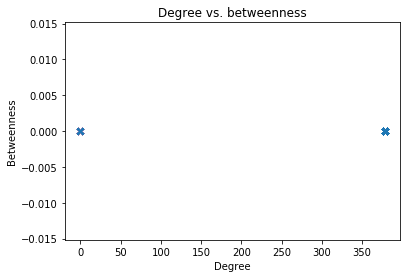

In [16]:
# Calculate centrality measures
degree = agraph.degree()
betweenness = agraph.betweenness(weights=None)
print("Number of degrees calculated : % 2d; minimum : % 2d, maximim : % 2d" %(len(degree), min(degree), max(degree)))
print("Betweeness: minimum: % 5.2f, maximum: % 5.4f" %(min(betweenness),max(betweenness)))
print()
print("Number of nodes: %s. Number of edges: %s" % (agraph.vcount(),agraph.ecount()))
print("Desity: %.4f" % (agraph.ecount()/(agraph.vcount()*(agraph.vcount()-1)/2)))

apl = agraph.average_path_length()

cls = agraph.closeness()
trans = agraph.transitivity_local_undirected() # Local clustering coefficient

plt.scatter(degree, betweenness, marker='x')
plt.title('Degree vs. betweenness')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
print('Correlation between Degree and Betweenness',np.corrcoef(degree, betweenness)[0][1])

In [17]:
print("Correlation of .1: ", np.sqrt(2*(1-.1)))
print("Correlation of .9: ", np.sqrt(2*(1-.9)))

Correlation of .1:  1.3416407864998738
Correlation of .9:  0.44721359549995787


In [18]:
gweights = np.array(agraph.es['weight'])
thids = np.where(gweights>1.34)[0]
th_graph = agraph.subgraph_edges(thids)

Number of degrees calculated :  379; minimum :  7, maximim :  354
Betweeness: minimum:  0.00, maximum:  6170.5693

Number of nodes: 379. Number of edges: 9241
Desity: 0.1290
Correlation between Degree and Betweenness 0.8232421099112248


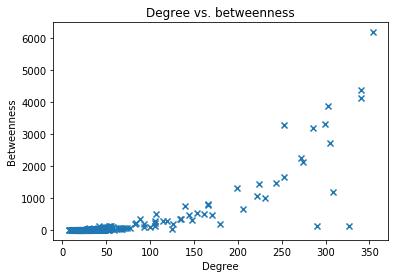

In [19]:
# Calculate centrality measures
degree = th_graph.degree()
betweenness = th_graph.betweenness(weights=None)
print("Number of degrees calculated : % 2d; minimum : % 2d, maximim : % 2d" %(len(degree), min(degree), max(degree)))
print("Betweeness: minimum: % 5.2f, maximum: % 5.4f" %(min(betweenness),max(betweenness)))
print()
print("Number of nodes: %s. Number of edges: %s" % (th_graph.vcount(),th_graph.ecount()))
print("Desity: %.4f" % (th_graph.ecount()/(th_graph.vcount()*(th_graph.vcount()-1)/2)))

apl = th_graph.average_path_length()

cls = th_graph.closeness()
trans = th_graph.transitivity_local_undirected() # Local clustering coefficient

plt.scatter(degree, betweenness, marker='x')
plt.title('Degree vs. betweenness')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
print('Correlation between Degree and Betweenness',np.corrcoef(degree, betweenness)[0][1])

Text(0.5, 1.0, 'Distribution of Degrees')

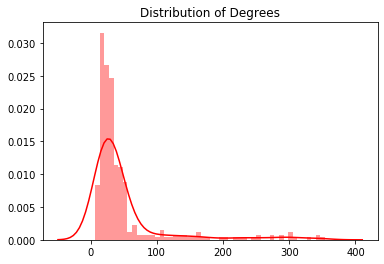

In [20]:
sns.distplot(th_graph.degree(),color='r')
plt.title('Distribution of Degrees')

# Minimum spanning tree

In [22]:
deg0 = np.where(np.array(agraph.degree())!=0)[0]
mst = agraph.subgraph(deg0)
red_g = mst.spanning_tree(weights=agraph.es['weight'])

In [23]:
mst.is_connected()

False

Number of nodes in subgraph:  379
Is connected False


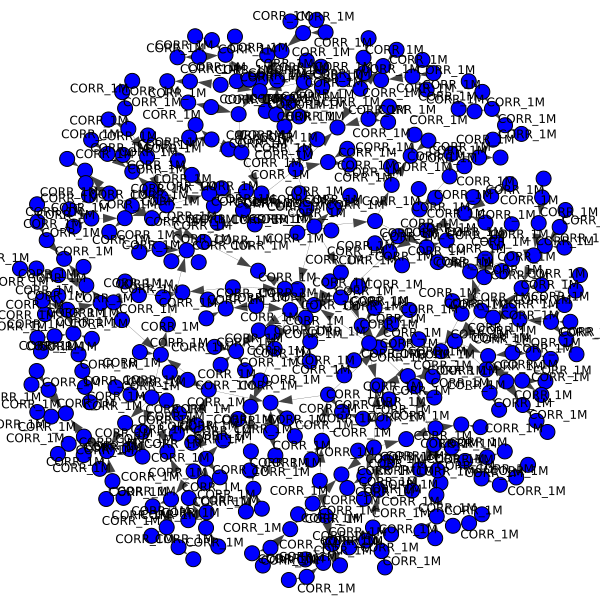

In [24]:

print("Number of nodes in subgraph: % 2d" %(len(red_g.vs())))
print("Is connected", red_g.is_connected())

layout_fr = red_g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = red_g.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(red_g, **visual_style)



Text(0.5, 1.0, 'Distribution of Degrees')

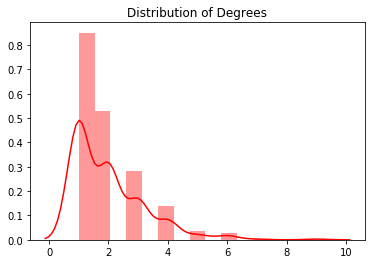

In [25]:
sns.distplot(red_g.degree(),color='r')
plt.title('Distribution of Degrees')

In [26]:
mst_degree = np.array(red_g.degree())
print("max degree:", max(mst_degree))
id_max = np.where(mst_degree == max(mst_degree))[0]
red_g.vs[id_max[0]].attributes()

max degree: 9


{'coutry_risk': 'SE',
 'name': 'Nibe Industrier AB',
 'label': '',
 'id': 'SE0008321293',
 'sector': 'Industrials'}

In [27]:
mst_th = th_graph.spanning_tree(weights=th_graph.es['weight'])

Number of nodes in subgraph:  379


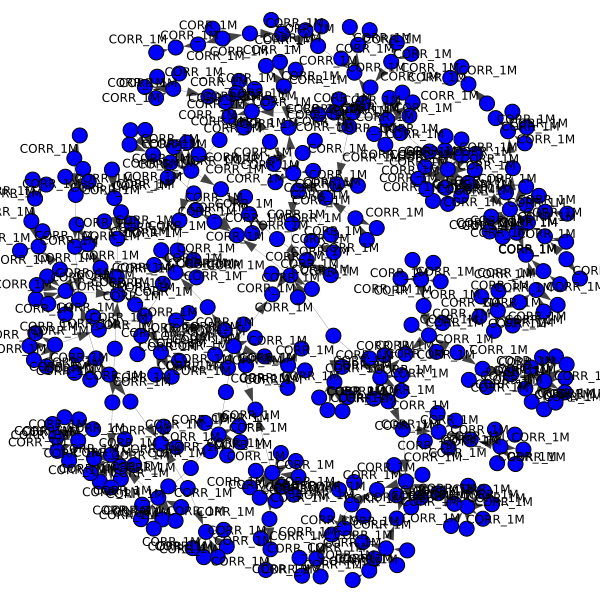

In [28]:
print("Number of nodes in subgraph: % 2d" %(len(mst_th.vs())))

layout_fr = mst_th.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = mst_th.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(mst_th, **visual_style)

# Community detection

In [29]:
th_graph.community_leiden(weights=th_graph.es['weight'])

AttributeError: 'Graph' object has no attribute 'community_leiden'

In [ ]:
th_graph.community_multilevel(weights=th_graph.es['weight'])

In [ ]:
th_graph.is_directed()

In [31]:
print(ig.__version__)

0.7.1
